#### Adaptive Resonance Theory Based Image Compression

In [1]:
from PIL import Image
from ART import *

##### 1. A Label Image Compressed by ART

In [2]:
# Open the image file
image = Image.open('./dataset/label.png')

# Preprocess the image
block_shape = (2, 2)
train_image, train_X, train_Y = preprocess_image(image, block_shape)

# Fit the fuzzy ART model
art = AdaptiveResonanceTheory(
    learning_rate=0.2, 
    alpha=1, 
    epsilon=0.9
    )
art.fit(train_X, train_Y)

Iteration 1: 16180 different clusters
Iteration 2: 8375 different clusters
Iteration 3: 5969 different clusters
Iteration 4: 4120 different clusters
Iteration 5: 6960 different clusters
Iteration 6: 592 different clusters
Iteration 7: 2962 different clusters
Iteration 8: 2168 different clusters
Iteration 9: 638 different clusters
Iteration 10: 92 different clusters
Iteration 11: 339 different clusters
Iteration 12: 54 different clusters
Iteration 13: 113 different clusters
Iteration 14: 29 different clusters
Iteration 15: 55 different clusters
Iteration 16: 93 different clusters
Iteration 17: 80 different clusters
Iteration 18: 116 different clusters
Iteration 19: 59 different clusters
Iteration 20: 14 different clusters
Iteration 21: 12 different clusters
Iteration 22: 32 different clusters
Iteration 23: 41 different clusters
Iteration 24: 2 different clusters
Iteration 25: 0 different clusters


In [3]:
# Denormalize the training image
train_image *= 255

# Decode the compressed image
compressed_image, length_after_RLE, trained_blocks = decode_compressed_image(
    art,
    train_image,
    block_shape
)

# Plot both original and compressed images
create_image_plot(art, train_image, compressed_image, block_shape)

# Evaluate compression performance
evaluate_compression(train_image, compressed_image, length_after_RLE, trained_blocks)

IndexError: index 125 is out of bounds for axis 0 with size 4

##### 2. A Dog Image Compressed by ART

In [4]:
# Open the image file
image = Image.open('./dataset/dog.png')

# Preprocess the image
block_shape = (2, 2)
train_image, train_X, train_Y = preprocess_image(image, block_shape)

# Fit the fuzzy ART model
art = AdaptiveResonanceTheory(
    learning_rate=0.2, 
    alpha=1, 
    epsilon=0.9
    )
art.fit(train_X, train_Y)

Iteration 1: 15750 different clusters
Iteration 2: 12626 different clusters
Iteration 3: 10456 different clusters
Iteration 4: 7137 different clusters
Iteration 5: 6565 different clusters
Iteration 6: 5464 different clusters
Iteration 7: 5929 different clusters
Iteration 8: 4992 different clusters
Iteration 9: 3105 different clusters
Iteration 10: 5316 different clusters
Iteration 11: 4866 different clusters
Iteration 12: 2893 different clusters
Iteration 13: 5131 different clusters
Iteration 14: 4412 different clusters
Iteration 15: 2570 different clusters
Iteration 16: 2526 different clusters
Iteration 17: 3419 different clusters
Iteration 18: 1397 different clusters
Iteration 19: 907 different clusters
Iteration 20: 700 different clusters
Iteration 21: 611 different clusters
Iteration 22: 1202 different clusters
Iteration 23: 2230 different clusters
Iteration 24: 526 different clusters
Iteration 25: 339 different clusters
Iteration 26: 353 different clusters
Iteration 27: 53 differe

d:\Python\Machine-Learing-Projects\.venv\Lib\site-packages\scipy\signal\_signaltools.py:1629: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)


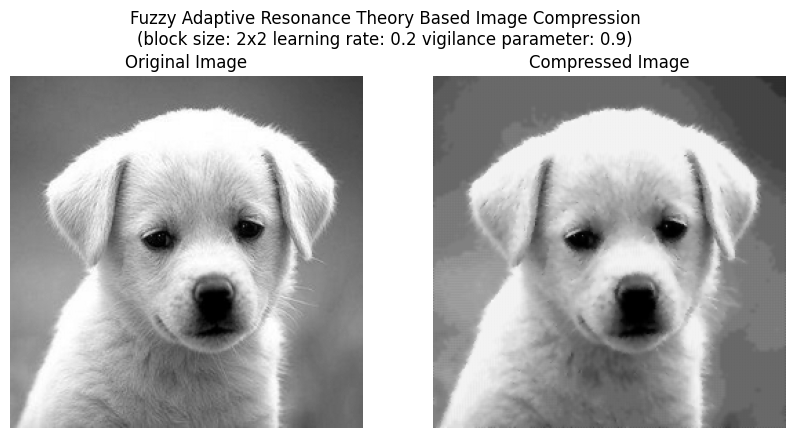

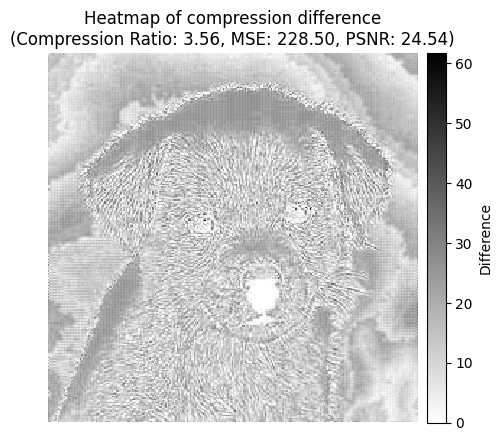

In [5]:
# Denormalize the training image
train_image *= 255

# Decode the compressed image
compressed_image, length_after_RLE, trained_blocks = decode_compressed_image(
    art,
    train_image,
    block_shape
)

# Plot both original and compressed images
create_image_plot(art, train_image, compressed_image, block_shape)

# Evaluate compression performance
evaluate_compression(train_image, compressed_image, length_after_RLE, trained_blocks)

##### 3. A Girl Image Compressed by ART

In [6]:
# Open the image file
image = Image.open('./dataset/girl.png')

# Preprocess the image
block_shape = (2, 2)
train_image, train_X, train_Y = preprocess_image(image, block_shape)

# Fit the fuzzy ART model
art = AdaptiveResonanceTheory(
    learning_rate=0.2, 
    alpha=1, 
    epsilon=0.9
    )
art.fit(train_X, train_Y)

Iteration 1: 16040 different clusters
Iteration 2: 12736 different clusters
Iteration 3: 8836 different clusters
Iteration 4: 7984 different clusters
Iteration 5: 9140 different clusters
Iteration 6: 5953 different clusters
Iteration 7: 4324 different clusters
Iteration 8: 2592 different clusters
Iteration 9: 2895 different clusters
Iteration 10: 6435 different clusters
Iteration 11: 4147 different clusters
Iteration 12: 3872 different clusters
Iteration 13: 2483 different clusters
Iteration 14: 2040 different clusters
Iteration 15: 1085 different clusters
Iteration 16: 695 different clusters
Iteration 17: 1197 different clusters
Iteration 18: 1365 different clusters
Iteration 19: 611 different clusters
Iteration 20: 624 different clusters
Iteration 21: 1229 different clusters
Iteration 22: 725 different clusters
Iteration 23: 344 different clusters
Iteration 24: 110 different clusters
Iteration 25: 224 different clusters
Iteration 26: 106 different clusters
Iteration 27: 139 different

d:\Python\Machine-Learing-Projects\.venv\Lib\site-packages\scipy\signal\_signaltools.py:1629: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)


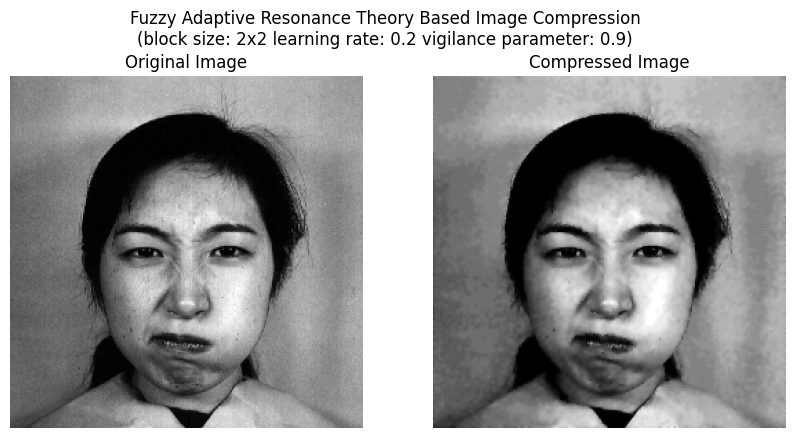

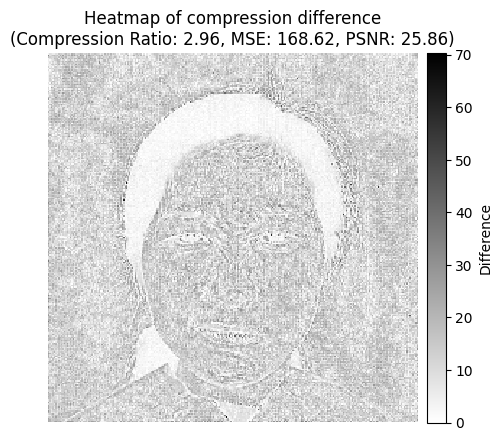

In [7]:
# Denormalize the training image
train_image *= 255

# Decode the compressed image
compressed_image, length_after_RLE, trained_blocks = decode_compressed_image(
    art,
    train_image,
    block_shape
)

# Plot both original and compressed images
create_image_plot(art, train_image, compressed_image, block_shape)

# Evaluate compression performance
evaluate_compression(train_image, compressed_image, length_after_RLE, trained_blocks)